<a href="https://colab.research.google.com/github/mwendemichelle4-dev/Aviation_Accident_Analysis/blob/main/Aviation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **BUSINESS UNDERSTANDING**


# **Overview**

This project seeks to analyze aviation accident and incident data to identify the potential risks associated with different aircraft types, with the goal of guiding the company in determining which aircraft are safest and most suitable for entry into the aviation industry. It is being carried out as part of the company’s strategy to diversify its portfolio into the purchase and operation of airplanes for both commercial and private enterprises, ensuring investments are made in low-risk options. The key stakeholders include the head of the aviation division, senior management responsible for diversification, and the data analytics team conducting the study. Set within the aviation industry, the project emphasizes safety, risk management, and evidence-based decision-making to support strategic aircraft acquisition.


# **Problem Statement**

The company is planning to expand into the aviation industry by purchasing and operating airplanes for both commercial and private use. However, management lacks adequate knowledge of the risks associated with different aircraft types, which poses a challenge in making safe and cost-effective investment decisions. Without a data-driven approach to understand accident patterns, damage severity, and injury outcomes, the company risks purchasing high-risk aircraft that could increase operational costs, insurance liabilities, and safety concerns.

# **Business Objectives**

1. To assess the relationship between accident severity and aircraft characteristics

2. To determine the impact of flight purpose on accident outcomes

3. To analyze the effect of weather conditions on accident severity

4. To examine accident patterns across different phases of flight

5. To rank aircraft makes and models based on safety outcomes

# **Data Mining Goals**

Clean and prepare aviation accident and incident data for analysis.

Analyze patterns across variables such as aircraft damage, injury severity, and investigation type.

Visualize findings to clearly communicate risk levels associated with different aircraft categories.

# **Success Criteria**

Deliver clear, data-driven recommendations on which aircraft types present the lowest risk.

Ensure that the aviation division has evidence-based insights to guide purchasing decisions.

Enable the company to enter the aviation industry with confidence by mitigating safety and financial risks.

# **Data Understanding**

In [637]:
# Import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



View first 5 rows

In [638]:
df = pd.read_csv('/content/Aviation_Data.csv')
df.head()

/tmp/ipython-input-3017319521.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


View last 5 rows


In [639]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [640]:
df.shape

(90348, 31)

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [642]:
# List of columns

df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [643]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [644]:
# Checking the number of missing values in each column

df.isna().sum()

,0
Event.Id,1459
Investigation.Type,0
Accident.Number,1459
Event.Date,1459
Location,1511
Country,1685
Latitude,55966
Longitude,55975
Airport.Code,40216
Airport.Name,37644


#  **Data Cleaning and Preparation**

I am going to drop columns with more than 25% missing values and also the columns which are not very relevant for the analysis for easier handling of the data.


In [645]:
df.drop(['Event.Id','Latitude','Longitude','Schedule','Airport.Code','Airport.Name','Location','Registration.Number','FAR.Description','Air.carrier','Report.Status','Publication.Date','Number.of.Engines'],axis=1,inplace=True)

In [646]:
df.columns

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

In [647]:
df

,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,NYC07LA005,1974-08-30,United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,CHI79FA064,1979-08-02,United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,ERA23LA093,2022-12-26,United States,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
90344,Accident,ERA23LA095,2022-12-26,United States,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
90345,Accident,WPR23LA075,2022-12-26,United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90346,Accident,WPR23LA076,2022-12-26,United States,NaN,NaN,NaN,CESSNA,210N,No,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


I am aslo going to add new columns to the dataset for analysis.

In [648]:
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

In [649]:
df

,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total.Injuries
0,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,2.0
1,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,4.0
2,Accident,NYC07LA005,1974-08-30,United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,NaN
3,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,2.0
4,Accident,CHI79FA064,1979-08-02,United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,ERA23LA093,2022-12-26,United States,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,1.0
90344,Accident,ERA23LA095,2022-12-26,United States,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0
90345,Accident,WPR23LA075,2022-12-26,United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,0.0
90346,Accident,WPR23LA076,2022-12-26,United States,NaN,NaN,NaN,CESSNA,210N,No,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,0.0




 Standadize the columns so that we can have consistent data for our analysis.



In [650]:
# Standadize Event.Date column

df = (
    df.assign(Event_Date=pd.to_datetime(df['Event.Date']))
      .assign(
          Year=lambda x: x['Event_Date'].dt.year,
          Month=lambda x: x['Event_Date'].dt.month_name(),
          Day=lambda x: x['Event_Date'].dt.day_name()
      )
)

df.head()

,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total.Injuries,Event_Date,Year,Month,Day
0,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,...,0.0,0.0,0.0,UNK,Cruise,2.0,1948-10-24,1948.0,October,Sunday
1,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,...,0.0,0.0,0.0,UNK,Unknown,4.0,1962-07-19,1962.0,July,Thursday
2,Accident,NYC07LA005,1974-08-30,United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,...,NaN,NaN,NaN,IMC,Cruise,NaN,1974-08-30,1974.0,August,Friday
3,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,...,0.0,0.0,0.0,IMC,Cruise,2.0,1977-06-19,1977.0,June,Sunday
4,Accident,CHI79FA064,1979-08-02,United States,Fatal(1),Destroyed,NaN,Cessna,501,No,...,2.0,NaN,0.0,VMC,Approach,NaN,1979-08-02,1979.0,August,Thursday


In [651]:
# Standadize Weather.Condition column

df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [652]:
# replace 'unk', 'UNK'and fill missing values 'nan' to 'Unknown'
df['Weather.Condition'] = df['Weather.Condition'].str.upper()
df['Weather.Condition'] = df['Weather.Condition'].replace('UNK', 'Unknown')
df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')
df['Weather.Condition'].unique()

array(['Unknown', 'IMC', 'VMC'], dtype=object)

In [653]:
# Standadize Injury.Severity column

df['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [696]:
df['Injury.Severity'] = df['Injury.Severity'].str.strip()

# Extract the word 'Fatal' from values like 'Fatal (4)'

df['Injury.Severity'] = df['Injury.Severity'].str.replace(r'^Fatal.*', 'Fatal', regex=True)

# correct the rest
df['Injury.Severity'] = df['Injury.Severity'].replace({
    'Non-Fatal': 'Non-Fatal',
    'Minor': 'Minor',
    'Serious': 'Serious',
    'Incident': 'Incident',
    'Unavailable': 'Unknown'})
# fill nan with unknown
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unknown')

df['Injury.Severity'].unique()

array(['Non-Fatal', 'Fatal', 'Incident', 'Unknown', 'Minor', 'Serious'],
      dtype=object)

In [697]:
df['Injury.Severity'].describe()

,Injury.Severity
count,88882
unique,6
top,Non-Fatal
freq,67356


In [655]:
# Standadize Investigation.Type column

df['Investigation.Type'].unique()

array(['Accident', 'Incident', '25-09-2020', '14-06-2021', '03-11-2020',
       '24-02-2021', '02-02-2021', '05-05-2021', '03-12-2020',
       '07-12-2020', '06-05-2021', '19-11-2020', '04-08-2021',
       '13-09-2021', '10-06-2021', '14-12-2021', '08-06-2021',
       '24-06-2021', '24-08-2021', '31-03-2021', '27-05-2021',
       '20-05-2021', '18-11-2020', '25-05-2021', '01-06-2021',
       '15-07-2021', '15-10-2021', '26-09-2020', '03-06-2021',
       '29-09-2021', '28-01-2021', '20-10-2021', '11-12-2020',
       '11-02-2021', '13-12-2021', '06-01-2021', '31-08-2021',
       '04-03-2021', '05-04-2021', '26-01-2021', '29-01-2021',
       '26-08-2021', '08-11-2021', '20-08-2021', '05-01-2021',
       '22-09-2021', '20-09-2021', '16-07-2021', '19-10-2021',
       '16-11-2021', '17-12-2021', '14-06-2022', '22-06-2022',
       '13-10-2022', '03-11-2022', '13-07-2022', '05-07-2022',
       '01-09-2022', '12-08-2022', '08-09-2022', '22-09-2022',
       '01-11-2022', '01-07-2022', '20-07-202

In [656]:

df['Investigation.Type'] = df['Investigation.Type'].where(
    df['Investigation.Type'].isin(['Accident', 'Incident'])
)

#Drop the null values in rows
df = df.dropna(subset=['Investigation.Type'])


# **Other Columns**

In [657]:
df['Total.Fatal.Injuries'].fillna(0, inplace = True)

df['Total.Serious.Injuries'].fillna(0, inplace = True)

df['Total.Minor.Injuries'].fillna(0, inplace = True)

df['Total.Uninjured'].fillna(0, inplace = True)

df['Total.Injuries'].fillna(0, inplace = True)

df['Model'].fillna('UNKNOWN',inplace=True)

df['Make'].fillna('UNKNOWN',inplace=True)

df['Country'].fillna('UNKNOWN',inplace=True)

df['Broad.phase.of.flight'].fillna('UNKNOWN',inplace = True)
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].replace('Unknown', 'UNKNOWN')

df['Engine.Type'].fillna('UNKNOWN',inplace=True)
df['Engine.Type'] = df['Engine.Type'].replace('Unknown', 'UNKNOWN')
df['Engine.Type'] = df['Engine.Type'].replace('UNK', 'UNKNOWN')

df['Purpose.of.flight'].fillna('Other Work Use',inplace=True)

df['Amateur.Built'].fillna('No',inplace=True)

/tmp/ipython-input-2981194109.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total.Fatal.Injuries'].fillna(0, inplace = True)
/tmp/ipython-input-2981194109.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [658]:
# Standadize Aircraft.damage column

df['Aircraft.damage'] = df['Aircraft.damage'].fillna('UNKNOWN')
df['Aircraft.damage'] = df['Aircraft.damage'].replace('Unknown', 'UNKNOWN')
df['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', 'UNKNOWN'], dtype=object)

In [659]:
# Standadize Aircraft.category column

df['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [660]:

df['Aircraft.Category'] = df['Aircraft.Category'].replace(['UNK','Unknown'], 'UNKNOWN')
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('UNKNOWN')
df['Aircraft.Category'].unique()

array(['UNKNOWN', 'Airplane', 'Helicopter', 'Glider', 'Balloon',
       'Gyrocraft', 'Ultralight', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'ULTR'], dtype=object)

Now lets check whether we handled our data well

In [661]:
df.isna().sum()

,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Country,0
Injury.Severity,0
Aircraft.damage,0
Aircraft.Category,0
Make,0
Model,0
Amateur.Built,0


Perfect! Now lets create a new clean dataset and start our visualization

In [662]:
clean_df = df.copy()
clean_df

,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total.Injuries,Event_Date,Year,Month,Day
0,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,UNKNOWN,Stinson,108-3,No,...,0.0,0.0,0.0,Unknown,Cruise,2.0,1948-10-24,1948.0,October,Sunday
1,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,UNKNOWN,Piper,PA24-180,No,...,0.0,0.0,0.0,Unknown,UNKNOWN,4.0,1962-07-19,1962.0,July,Thursday
2,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,UNKNOWN,Cessna,172M,No,...,0.0,0.0,0.0,IMC,Cruise,0.0,1974-08-30,1974.0,August,Friday
3,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,UNKNOWN,Rockwell,112,No,...,0.0,0.0,0.0,IMC,Cruise,2.0,1977-06-19,1977.0,June,Sunday
4,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,UNKNOWN,Cessna,501,No,...,2.0,0.0,0.0,VMC,Approach,0.0,1979-08-02,1979.0,August,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,ERA23LA093,2022-12-26,United States,Minor,UNKNOWN,UNKNOWN,PIPER,PA-28-151,No,...,1.0,0.0,0.0,Unknown,UNKNOWN,1.0,2022-12-26,2022.0,December,Monday
90344,Accident,ERA23LA095,2022-12-26,United States,Unknown,UNKNOWN,UNKNOWN,BELLANCA,7ECA,No,...,0.0,0.0,0.0,Unknown,UNKNOWN,0.0,2022-12-26,2022.0,December,Monday
90345,Accident,WPR23LA075,2022-12-26,United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,...,0.0,0.0,1.0,VMC,UNKNOWN,0.0,2022-12-26,2022.0,December,Monday
90346,Accident,WPR23LA076,2022-12-26,United States,Unknown,UNKNOWN,UNKNOWN,CESSNA,210N,No,...,0.0,0.0,0.0,Unknown,UNKNOWN,0.0,2022-12-26,2022.0,December,Monday


Reset the Indexes

In [663]:
clean_df = df.reset_index(drop=True)
clean_df

,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total.Injuries,Event_Date,Year,Month,Day
0,Accident,SEA87LA080,1948-10-24,United States,Fatal,Destroyed,UNKNOWN,Stinson,108-3,No,...,0.0,0.0,0.0,Unknown,Cruise,2.0,1948-10-24,1948.0,October,Sunday
1,Accident,LAX94LA336,1962-07-19,United States,Fatal,Destroyed,UNKNOWN,Piper,PA24-180,No,...,0.0,0.0,0.0,Unknown,UNKNOWN,4.0,1962-07-19,1962.0,July,Thursday
2,Accident,NYC07LA005,1974-08-30,United States,Fatal,Destroyed,UNKNOWN,Cessna,172M,No,...,0.0,0.0,0.0,IMC,Cruise,0.0,1974-08-30,1974.0,August,Friday
3,Accident,LAX96LA321,1977-06-19,United States,Fatal,Destroyed,UNKNOWN,Rockwell,112,No,...,0.0,0.0,0.0,IMC,Cruise,2.0,1977-06-19,1977.0,June,Sunday
4,Accident,CHI79FA064,1979-08-02,United States,Fatal,Destroyed,UNKNOWN,Cessna,501,No,...,2.0,0.0,0.0,VMC,Approach,0.0,1979-08-02,1979.0,August,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,2022-12-26,United States,Minor,UNKNOWN,UNKNOWN,PIPER,PA-28-151,No,...,1.0,0.0,0.0,Unknown,UNKNOWN,1.0,2022-12-26,2022.0,December,Monday
88885,Accident,ERA23LA095,2022-12-26,United States,Unknown,UNKNOWN,UNKNOWN,BELLANCA,7ECA,No,...,0.0,0.0,0.0,Unknown,UNKNOWN,0.0,2022-12-26,2022.0,December,Monday
88886,Accident,WPR23LA075,2022-12-26,United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,...,0.0,0.0,1.0,VMC,UNKNOWN,0.0,2022-12-26,2022.0,December,Monday
88887,Accident,WPR23LA076,2022-12-26,United States,Unknown,UNKNOWN,UNKNOWN,CESSNA,210N,No,...,0.0,0.0,0.0,Unknown,UNKNOWN,0.0,2022-12-26,2022.0,December,Monday


# **DATA ANALYSIS**






# 1. **Number of Accidents Across The Years (Time Based Analysis)**


Lets look at the accident trends over the years.

# **Plot 1. Accidents Trend by Years**

In [684]:
# I have noticed that there is very little data about years before 1982 so i am going to limit the plots from 1982 onwards.

clean_df=clean_df[clean_df['Year']>=1982]

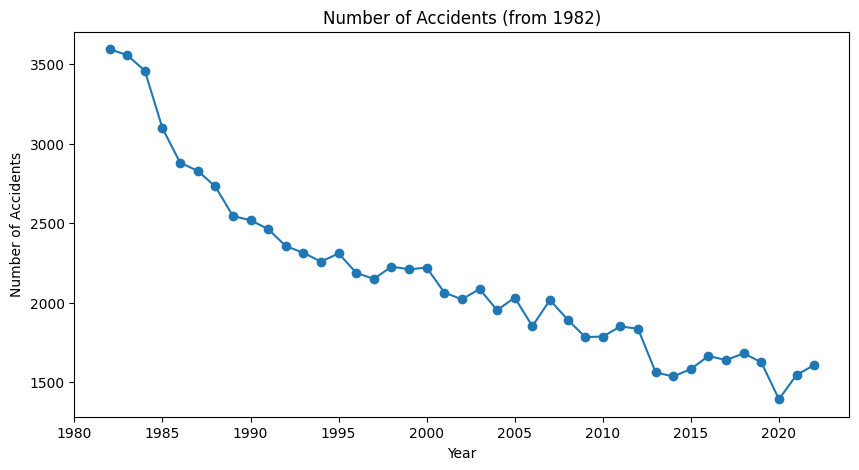

In [685]:
yearly = clean_df.groupby('Year')['Accident.Number'].count()

plt.figure(figsize=(10, 5))
plt.plot(yearly.index, yearly.values, marker='o')
plt.title("Number of Accidents (from 1982)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()



# **Plot 2. Accident Trends by Months**

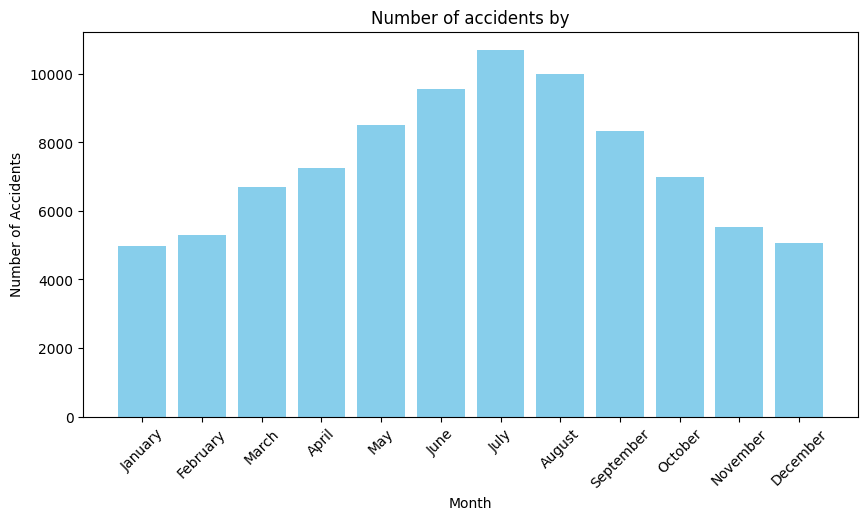

In [689]:
# --- Monthly accidents ---
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

monthly = clean_df.groupby('Month')['Accident.Number'].count().reindex(month_order)

plt.figure(figsize=(10, 5))
plt.bar(monthly.index, monthly.values, color="skyblue")
plt.title("Number of accidents by")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()



# **Plot 3.**  **Accident Count by Days**

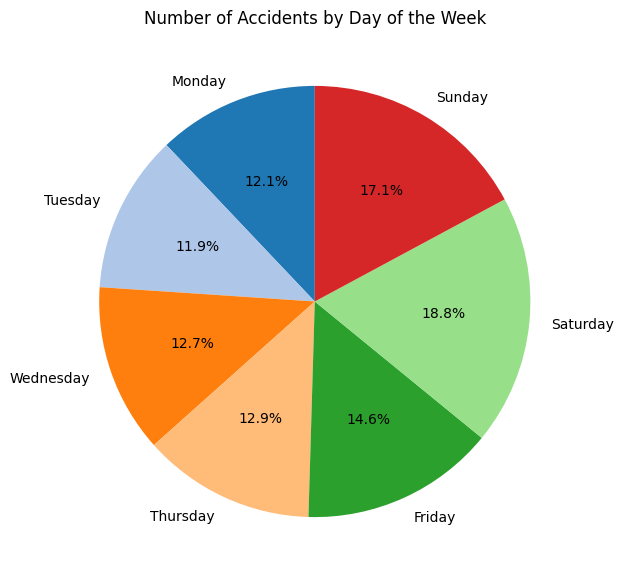

In [691]:
# --- Weekday accidents ---
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

week_day = df.groupby('Day')['Accident.Number'].count().reindex(week_order)

plt.figure(figsize=(7, 7))
plt.pie(
    week_day.values,
    labels=week_day.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors
)
plt.title("Number of Accidents by Day of the Week")
plt.show()


# Findings
* We can see from **plot 1** that the Accidents counts are on a downward trend since 1982. This sugests improvement in aviation safety and the overall risk management within the aviation industry.
* From **plot 2** we can see that most Accidents happen between the months of June and August.
* **Plot 3** shows that most accidents occur during weekends i.e  Saturdays and Sundays.




# 2. **Total Injury Count Over The Years (Time Based Analysis)**

# **Plot 1**


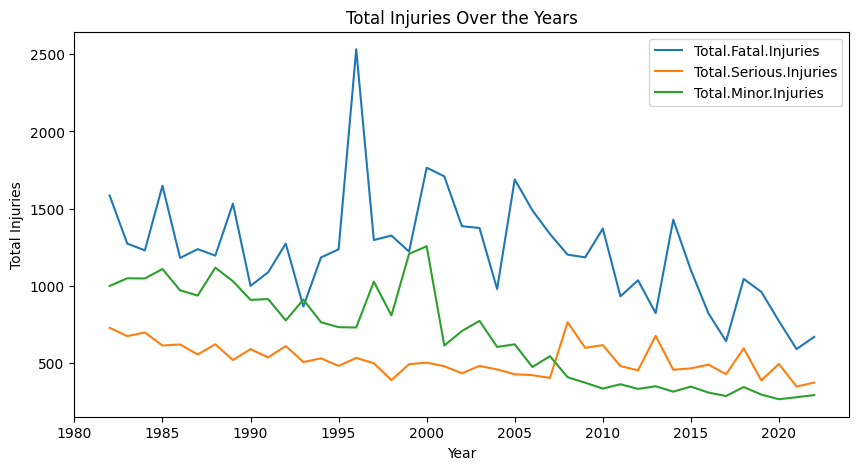

In [693]:
by_year= df.groupby('Year')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].sum().reset_index()
by_year.set_index('Year').plot(kind='line', figsize=(10, 5))
plt.title("Total Injuries Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Injuries")
plt.show()

# Findings


*  The graph suggests significant progress in aviation safety over the past 40 years. The decrease in all injury types—especially fatalities—points toward better aircraft technology, stricter regulations, and improved emergency response.




# **Categorical Analysis**

# 1. Investigation Type

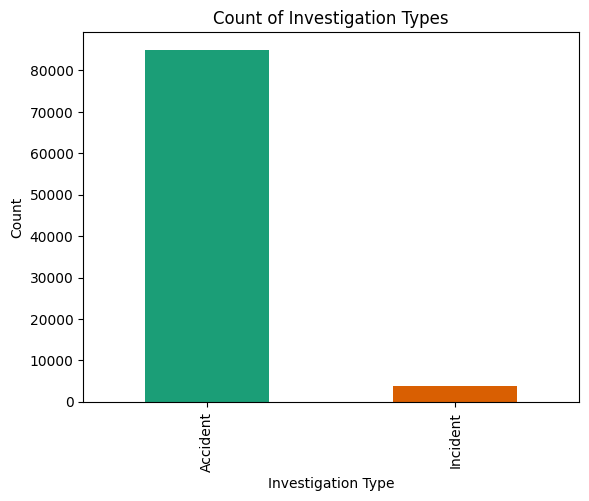

In [670]:
# Count of each Investigation.Type
investigation_counts = clean_df['Investigation.Type'].value_counts()

# Vertical bar plot
investigation_counts.plot(kind='bar', color=sns.color_palette('Dark2', len(investigation_counts)))


plt.ylabel('Count')
plt.xlabel('Investigation Type')
plt.title('Count of Investigation Types')

plt.show()

# Findings
* The vast majority of records are Accidents, while Incidents form only a small fraction. The focus of safety risk analysis should primarily be on accidents, since they represent the greatest operational and financial risk.

# 2. Injury Totals.

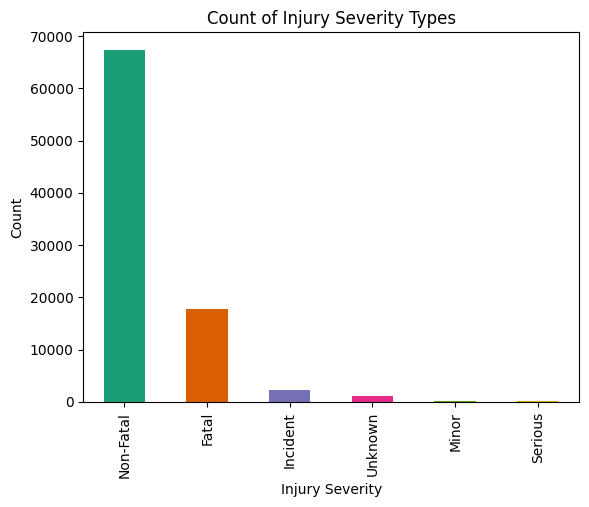

In [671]:
# Count of each Injury.Severity
injury_counts = clean_df['Injury.Severity'].value_counts()

# Vertical bar plot
injury_counts.plot(kind='bar', color=sns.color_palette('Dark2', len(injury_counts)))

plt.ylabel('Count')
plt.xlabel('Injury Severity')
plt.title('Count of Injury Severity Types')

plt.show()

# 3. Damage Severity Distribution

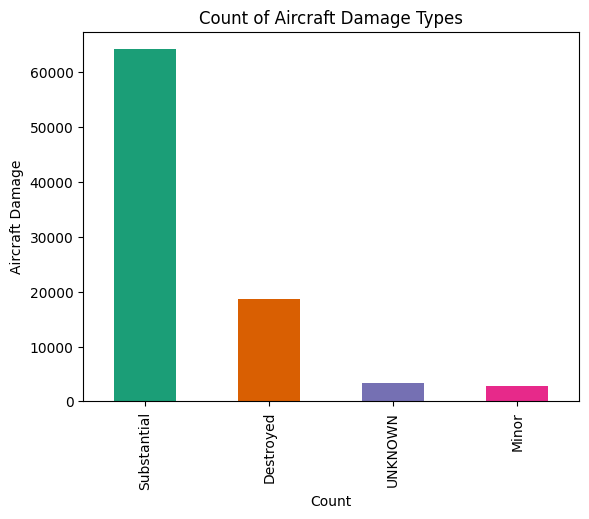

In [672]:
damage_counts = clean_df['Aircraft.damage'].value_counts()

# bar plot
damage_counts.plot(kind='bar', color=sns.color_palette('Dark2', len(damage_counts)))
plt.xlabel('Count')
plt.ylabel('Aircraft Damage')
plt.title('Count of Aircraft Damage Types')

plt.show()

# Findings

* A large portion of accidents result in Substantial or Destroyed aircraft damage. Minor damage cases are much less frequent. This suggests that when accidents occur, they are often costly in terms of aircraft loss.

# 4. Amateur built

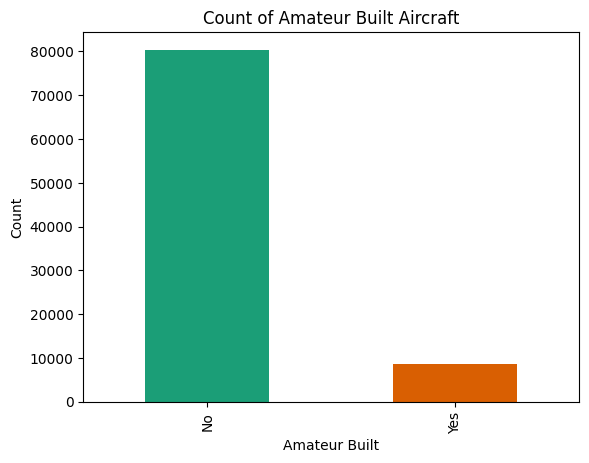

In [673]:
amateur_counts = clean_df['Amateur.Built'].value_counts()

amateur_counts.plot(kind='bar', color=sns.color_palette('Dark2', len(amateur_counts)))

plt.ylabel('Count')
plt.xlabel('Amateur Built')
plt.title('Count of Amateur Built Aircraft')

plt.show()


# Findings



#

# **Count the number of Accidents as per Countries**

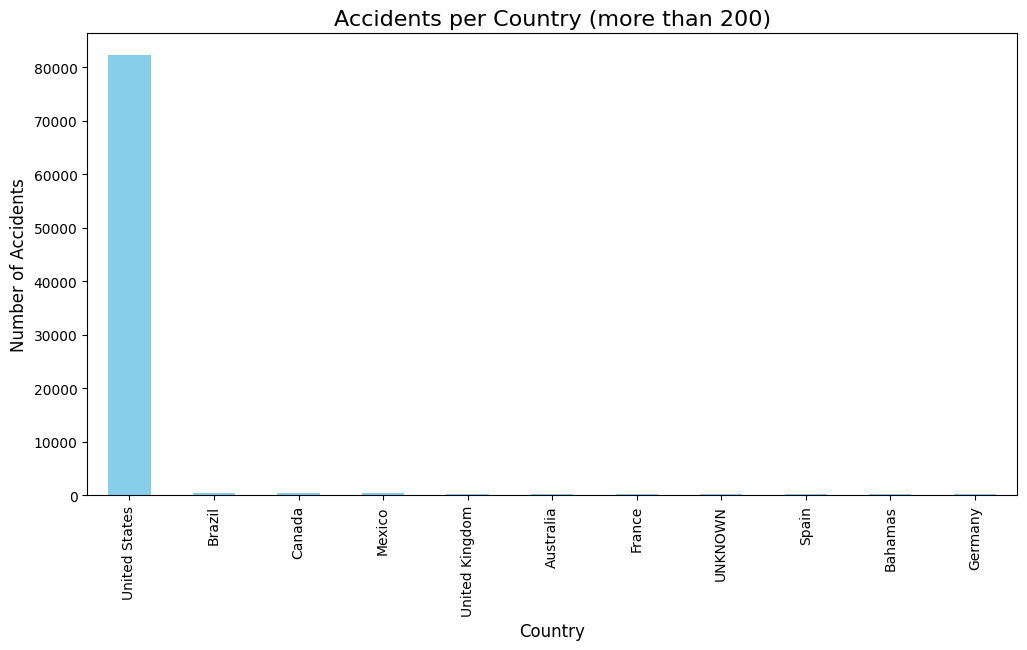

In [700]:
accidents = clean_df['Country'].groupby(clean_df['Country']).count().sort_values(ascending=False)
accidents


# Filter the accident counts to those with over 200

# Count accidents per country and filter those > 200
accidents = clean_df['Country'].value_counts()
accidents = accidents[accidents > 200]

# Plot
plt.figure(figsize=(12,6))
accidents.plot(kind='bar', color='skyblue')

plt.title("Accidents per Country (more than 200)", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.show()

# Most accidents occured in United States.

# **Total Injuries by Phase of Flight & Weather Condition**

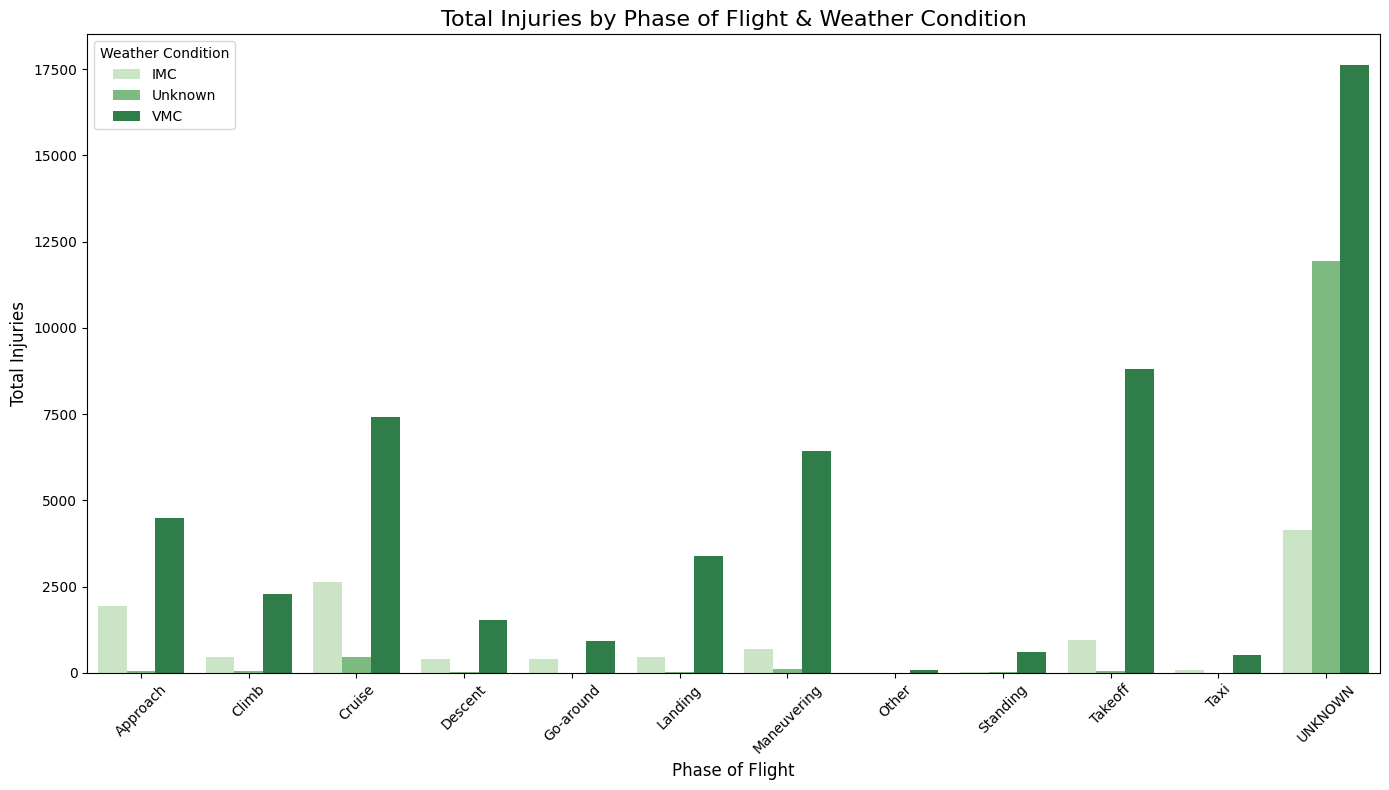

In [675]:
plt.figure(figsize=(14,8))

# Group by phase + weather and sum injuries
injuries = clean_df.groupby(
    ["Broad.phase.of.flight", "Weather.Condition"]
)["Total.Injuries"].sum().reset_index()

# Plot
sns.barplot(
    data=injuries,
    x="Broad.phase.of.flight",
    y="Total.Injuries",
    hue="Weather.Condition",
    palette="Greens"
)

plt.xticks(rotation=45)
plt.title("Total Injuries by Phase of Flight & Weather Condition", fontsize=16)
plt.xlabel("Phase of Flight", fontsize=12)
plt.ylabel("Total Injuries", fontsize=12)
plt.legend(title="Weather Condition")
plt.tight_layout()
plt.show()


# Findings
a). The plot shows that most accidents happened when the weather conditions were clear for flights.

b). Most accidents occured during take off and cruise.

# **Distribution of Accidents by Flight purpose**

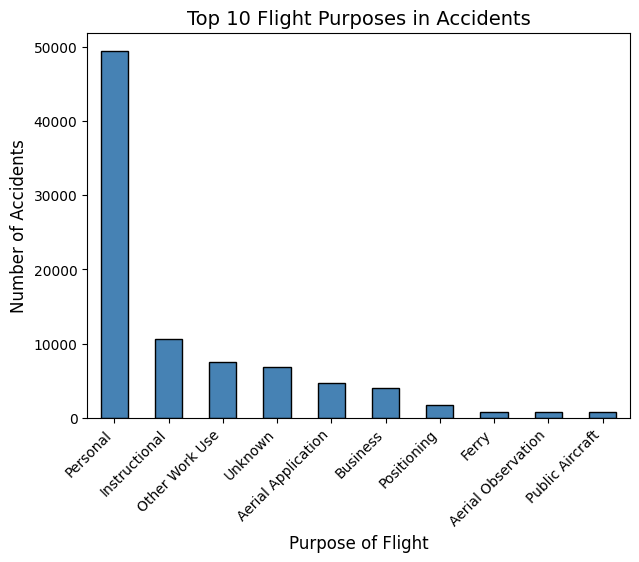

In [676]:
top_10_purposes = clean_df['Purpose.of.flight'].value_counts().nlargest(10)

plt.figure(figsize=(7,5))
ax = top_10_purposes.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title('Top 10 Flight Purposes in Accidents', fontsize=14)
plt.xlabel('Purpose of Flight', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right')

#plt.tight_layout()
plt.show()


# **Aircraft Manufacturer Analysis**

Lets see the relationship between Make, Model and Engine types with accidents

In [679]:
# Group and count accidents by Make + Model
make_model_accident_counts = clean_df.groupby(['Make', 'Model']).size().reset_index(name='Total.Injured', drop=False)
make_model_accident_counts = make_model_accident_counts.sort_values(by='Total.Injured', ascending=False)
make_model_accident_counts.head(10)


,Make,Model,Total.Injured
5754,Cessna,152,2168
5776,Cessna,172,1254
5820,Cessna,172N,996
15098,Piper,PA-28-140,812
5729,Cessna,150,716
5818,Cessna,172M,667
5823,Cessna,172P,597
5753,Cessna,150M,539
14992,Piper,PA-18,539
15107,Piper,PA-28-161,502


/tmp/ipython-input-254537782.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


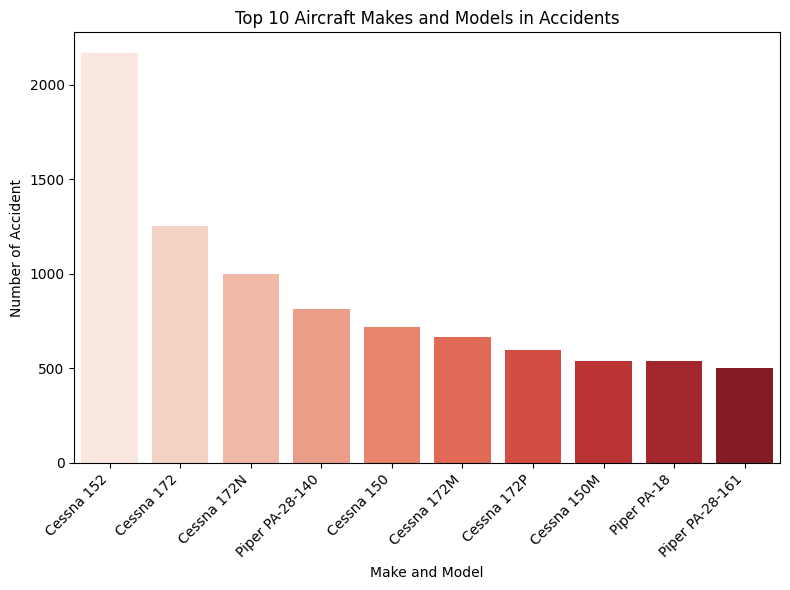

In [701]:
top_10_make_model = make_model_accident_counts.head(10)

plt.figure(figsize=(8,6))
sns.barplot(
    data=top_10_make_model,
    x=top_10_make_model['Make'] + " " + top_10_make_model['Model'],
    palette="Reds",
    y= "Total.Injured"
)
plt.title("Top 10 Aircraft Makes and Models in Accidents")
plt.xlabel("Make and Model")
plt.ylabel("Number of Accident")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3795516142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


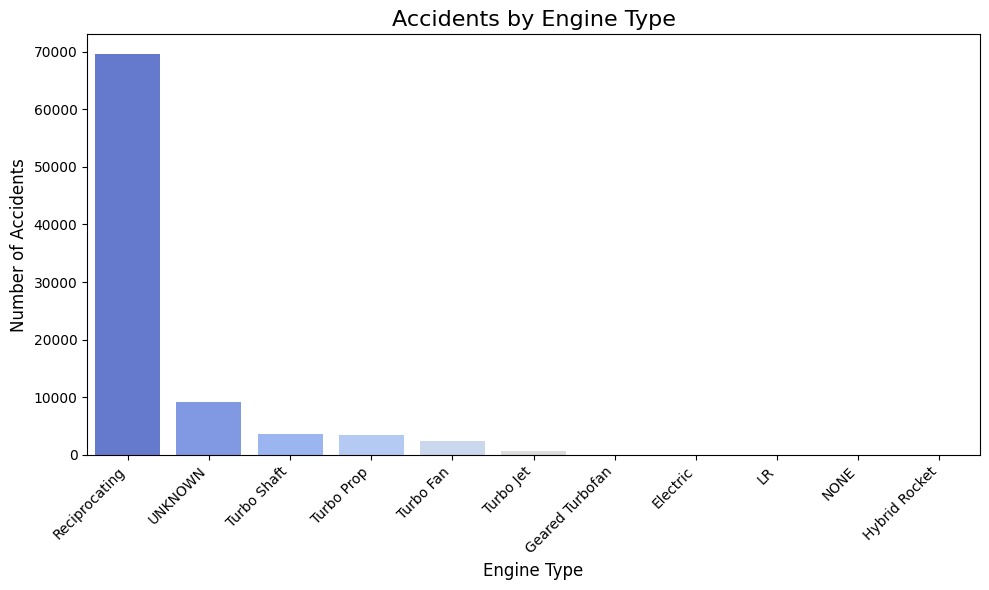

In [699]:
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=clean_df,
    x="Engine.Type",   # use Engine.Type (string categories), not Number.of.Engines
    order=clean_df['Engine.Type'].value_counts().index,
    palette="coolwarm"
)

plt.title("Accidents by Engine Type", fontsize=16)
plt.xlabel("Engine Type", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()